# NY Housing prices and amenities Analysis

*#
Project Title: Which housing factor is most valuable to homebuyers in New York City?

Team Members: Alana Adams, Maria Gutierrez Valencia, Lincoln Martin, Sharada Muthusubramanian

Project Description/Outline: 

Research Questions to Answer:
Hypothesis: Null (H0) hypothesis - number of bedrooms increases the price of the house will not be change
Alternative Hypothesis (H1) - as the number of bedrooms increase the price of the house will have the tendency to increase.

1. Does area of house or number of bedrooms matter more to homebuyers?
2. Is a furnished home more preferred than an unfurnished home? 
3. Does the main road status matter to homebuyers?
4. Does number of parking spaces have any correlation to housing price?
5. Do New Yorkers prefer houses with basements over guestrooms?
6. Can we predict housing price based on area of the house?
7. Do the number of bathrooms correlate with the number of bedrooms?
8. Do we see a relationship between price and number of stories in a house?
9. Does the total number of rooms (bathroom, bedroom, guestroom, basement) increase home price more than total area?



In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress
import scipy.stats as st

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
ny_housing = Path("Resources/Housing.csv")
ny_condo_zip = Path("Resources/Zip_Condo_NY.csv")

# Read School and Student Data File and store into Pandas DataFrames
ny_housing_df = pd.read_csv(ny_housing)
ny_condo_df = pd.read_csv(ny_condo_zip)
ny_housing_df.head()
#ny_condo_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## 1. Does area of house or number of bedrooms matter more to homebuyers?

In [ ]:
#Copy the DF

# Establish the bins 
area_bins = [0, 585, 630, 645, 680]
ar_labels = ["0-$585", "$585-630", "$630-645", "$645-680"]

In [ ]:
# Use `pd.cut` to categorize area of the house based on the bins.
df["area"] =  pd.cut( df["area"], area_bins,labels= ar_labels, include_lowest=True, ordered=False)
df

In [ ]:
# Plot line graph to measure the preference of the home buyer area VS. home buyer


## 2. Is a furnished home more preferred than an unfurnished home? 

In [ ]:
#Group the housing price by  furnishing status and get mean, median, mode, std deviation and variance by the furnishing status

In [ ]:
# Generate a pie plot showing the distribution of furnishing status (using pyplot and Pandas)

#save the plot as figure

## 3. Does the main road status matter to homebuyers?

In [ ]:
#Group the housing price by Mainroad and get mean

In [ ]:
# plot a pie chrt to show the preferance

##  4. Does number of parking spaces have any correlation to housing price?

In [ ]:
#calculate the correlation coefficent parking spaces in realtion to housing price

# calculate slope, intercepts, pvalue, rvalue 


In [ ]:
# Plot scatter plot and draw the linear regression

## 5. Do New Yorkers pay more value with houses with basements over guestrooms?

                        price
guestroom_and_basement       
basement                  120
both                       71
guestroom                  26
neither                   328
                           price
guestroom_and_basement          
basement                4.959908
both                    5.720430
guestroom               5.990788
neither                 4.392584


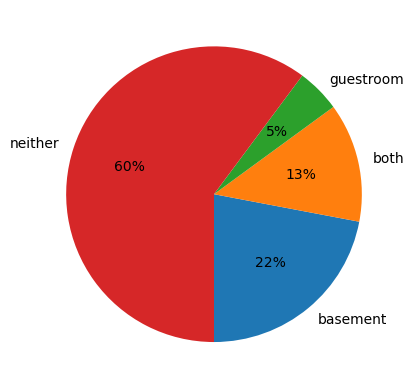

In [70]:
#copy ny_housing_df
basements_vs_guestrooms_df = ny_housing_df.copy(deep=True)

#drop unnecessary columns
basements_vs_guestrooms_df = basements_vs_guestrooms_df.drop(["area", "bedrooms", "bathrooms", "stories", "mainroad", "hotwaterheating", "airconditioning", "parking", "prefarea", "furnishingstatus"], axis=1)

#add comparison column
basements_vs_guestrooms_df["guestroom_and_basement"] = basements_vs_guestrooms_df["guestroom"].astype(str) +"_and_" + basements_vs_guestrooms_df["basement"]

#replace no_and_no with neither, replace no_and_yes with basement, replace yes_and_yes with both, and replace yes_and_no with guestroom
basements_vs_guestrooms_df.loc[basements_vs_guestrooms_df["guestroom_and_basement"] == "no_and_no", "guestroom_and_basement"] = "neither"
basements_vs_guestrooms_df.loc[basements_vs_guestrooms_df["guestroom_and_basement"] == "no_and_yes", "guestroom_and_basement"] = "basement"
basements_vs_guestrooms_df.loc[basements_vs_guestrooms_df["guestroom_and_basement"] == "yes_and_no", "guestroom_and_basement"] = "guestroom"
basements_vs_guestrooms_df.loc[basements_vs_guestrooms_df["guestroom_and_basement"] == "yes_and_yes", "guestroom_and_basement"] = "both"
basements_vs_guestrooms_df.head()

#Calculate the number of houses with basement and with guestrooms and with both basement & guestrooms
bsmt_gstrm_count = basements_vs_guestrooms_df.groupby(["guestroom_and_basement"]).count()["price"]
bsmt_gstrm_count_df = pd.DataFrame(bsmt_gstrm_count)
print(bsmt_gstrm_count_df)

#Calculate the average housing price with basement and with guestrooms and with both basement & guestrooms in the millions
bsmt_gstrm_average = basements_vs_guestrooms_df.groupby(["guestroom_and_basement"]).mean()["price"]/1000000
bsmt_gstrm_average_df = pd.DataFrame(bsmt_gstrm_average)
print(bsmt_gstrm_average_df)

#create pie chart for homebuyer preferences
bsmt_gstrm_count.plot(kind='pie', y='price', autopct='%1.0f%%', startangle=270, ylabel='')
plt.savefig("Resources/basement_vs_guestroom_pie.png")
plt.show()

In [27]:
# Create a boxplot to compare means
basements_vs_guestrooms_df.boxplot("price", by="guestroom_and_basement", figsize=(20, 10))
plt.savefig("Resources/basement_vs_guestroom_price_boxplot.png")

# Extract individual groups
basement = basements_vs_guestrooms_df[basements_vs_guestrooms_df["guestroom_and_basement"] == "basement"]["price"]
both = basements_vs_guestrooms_df[basements_vs_guestrooms_df["guestroom_and_basement"] == "both"]["price"]
guestroom = basements_vs_guestrooms_df[basements_vs_guestrooms_df["guestroom_and_basement"] == "guestroom"]["price"]
neither = basements_vs_guestrooms_df[basements_vs_guestrooms_df["guestroom_and_basement"] == "neither"]["price"]

# Perform the ANOVA
st.f_oneway(basement, both, guestroom, neither)

F_onewayResult(statistic=15.868354541445633, pvalue=6.673363122676321e-10)

**Interpretation**

* Although the boxplot shows that average house price increases with the addition of a basement, increases again with the addition of a basement and a guestroom, a greater increase in house price is seen in those houses with only a guestroom and not a basement.  

* However, the ANOVA test does not show a statistically significant difference between the groups and their effects on price, F= 15.87, p-value= 6.67e-10. 

* New Yorkers show an increased preference towards, guest room, having both a guest room and basement, and having basements over not having either feature (in that order, as demonstrated by housing price as an indicator of feature value).  However, this correlation is tenuous.

* New Yorkers much more frequently inhabit homes with neither basement nor guest room features than either or both features. Homes with basements are 3.4 times more frequently inhabited than homes with guest rooms.

* This indicates that although guest rooms are valued more highly by NY homebuyers as reflected by price, basements are more frequently purchased by NY homebuyers.


## 6. Can we predict housing price based on area of the house?

          price      area
price  1.000000  0.535997
area   0.535997  1.000000
The r-value is: 0.2872931546811461
Given the house price of $5,005,000, the estimated area of the house would be 5666.0.  The actual area of this house with price $5,005,000 is 8150 meters squared.  This is a difference of -30.5%.
Given the house area of 7410, the estimated price of the house would be 5810542.0.  The actual price of this house with area 7410 is 6475000 meters squared.  This is a difference of -10.0%.


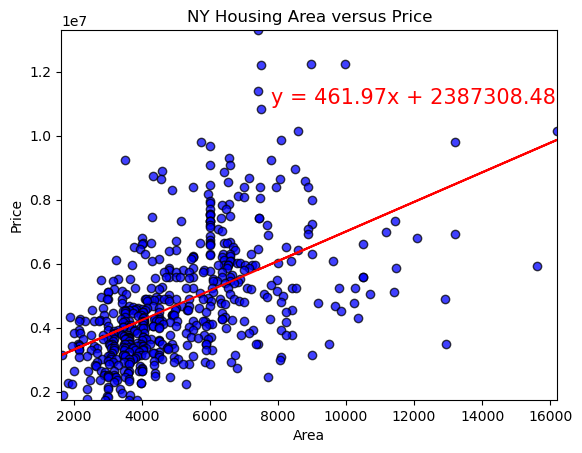

In [54]:
#copy ny_housing_df
area_vs_price_df = ny_housing_df.copy(deep=True)

#drop unnecessary columns
area_vs_price_df = area_vs_price_df.drop(["basement", "guestroom", "bedrooms", "bathrooms", "stories", "mainroad", "hotwaterheating", "airconditioning", "parking", "prefarea", "furnishingstatus"], axis=1)

#calculate the correlation coefficient area in realtion to housing price
area_corr_coeff = area_vs_price_df.corr(method='pearson',min_periods=1)
print(area_corr_coeff)

#Scatter Plot
plt.scatter(area_vs_price_df["area"], area_vs_price_df["price"], marker="o", facecolors="b", edgecolors="black", alpha=0.75)
plt.ylim(area_vs_price_df["price"].min()-10,area_vs_price_df["price"].max()+10)
plt.xlim(area_vs_price_df["area"].min()-10,area_vs_price_df["area"].max()+10)
plt.title("NY Housing Area versus Price")
plt.xlabel("Area")
plt.ylabel("Price")

#calculate slope, intercepts, pvalue, rvalue the best fit line to calculate the housing price
df_slope, df_int, df_r, df_p, df_std_err = linregress(area_vs_price_df["area"], area_vs_price_df["price"])
df_fit = df_slope * area_vs_price_df["area"] + df_int
plt.plot(area_vs_price_df["area"],df_fit,"r-")
line_eq = "y = " + str(round(df_slope,2)) + "x + " + str(round(df_int,2))
plt.annotate(line_eq,(7800,1.1e7),fontsize=15,color="red")

area_estimate = round((5005000-df_int)/df_slope,0)
area_actual = 8150
diff_in_area = round((area_estimate-area_actual)/area_actual,3)*100
price_estimate = round((df_slope*7410) + df_int,0)
price_actual = 6475000
diff_in_price = round((price_estimate-price_actual)/price_actual,2)*100

print(f"The r-value is: {df_r**2}")
print(f"Given the house price of $5,005,000, the estimated area of the house would be {area_estimate}.  The actual area of this house with price $5,005,000 is {area_actual} meters squared.  This is a difference of {diff_in_area}%.")
print(f"Given the house area of 7410, the estimated price of the house would be {price_estimate}.  The actual price of this house with area 7410 is {price_actual} meters squared.  This is a difference of {diff_in_price}%.")

# Save the figure
plt.savefig("Resources/area_vs_price.png")

# Show plot
plt.show()

**Interpretation**

* The correlation coefficient between Area and Price is 0.54.  This shows a moderate positive correlation, such that as Area increases, price also increased. However, the r-value of 0.29 indicates that area and price have a low correlation. This was also indicated by our sample tests. 

* In the first test, there was a 30.5% difference between the predicted area (5666) and actual area (8150) when given the house price (5,005,000). 

* In the second test, there was a 10% difference between the predicted price (5,810,542) and actual price (6,475,000 ) when given the house area (7410). 

* There insufficient correlation between Area and Price to determine with confidence the affect Area has on NY Housing Prices.

##  7. Do the number of bathrooms correlate with the number of bedrooms?

In [50]:
#copy ny_housing_df
bathrooms_vs_bedrooms_vs_price_df = ny_housing_df.copy(deep=True)

#drop unnecessary columns
bathrooms_vs_bedrooms_vs_price_df = bathrooms_vs_bedrooms_vs_price_df.drop(["basement", "guestroom", "area", "stories", "mainroad", "hotwaterheating", "airconditioning", "parking", "prefarea", "furnishingstatus"], axis=1)

#calculate the correlation coefficent between bathrooms and number of bedrooms inrelation to pricing
bathroom_price_corr_coeff = bathrooms_vs_bedrooms_vs_price_df.corr(method='pearson',min_periods=1)
print(bathroom_price_corr_coeff)


              price  bedrooms  bathrooms
price      1.000000  0.366494   0.517545
bedrooms   0.366494  1.000000   0.373930
bathrooms  0.517545  0.373930   1.000000


##Interpretation##

The correlation coefficient between Bedrooms and Price is 0.37. This indicates a very weak correlation between Bedrooms and Price such that as the number of bedrooms in a house increases, the price is likely to increase.

The correlation coefficient between Bathrooms and Price is 0.52. This indicates a moderate correlation between Bedrooms and Price such that as the number of bathrooms in a house increases, the price is likely to increase.

The correlation coefficient between Bedrooms and Bathrooms is 0.37. This indicates a very weak correlation between Bedrooms and Price such that as the number of bedrooms in a house increases, the number of bathrooms. is likely to increase.

This data indicates that the number of bathrooms in a house is more favorable to homebuyers than the number of bedrooms, because the correlation coefficient indicates a stronger positive relationship between number of bathrooms and price than number of bedrooms and price.  This refutes the claim that bedrooms are the most important feature to homebuyers.

##  8. Do we see a relationship between price and number of stories in a house?

In [ ]:
#Scatter plot number of stories to price

##  9. Does the total number of rooms (bathroom, bedroom, guestroom, basement) increase home price more than total area?

In [ ]:
# summerize the number of rooms and store it in a new column

#compare average price per room and average price per sqrft

##  10. General Data Analysis of NY housing market

In [ ]:
# create a dataframe of homes that are prices above a million doller 

#Generate a bar plot showing the million+ dollar homes